모듈 입력.

In [1]:
import pandas as pd
from datetime import *

hyperparameter 입력.

In [2]:
"""
min1 : 공정 중지시작시각에서 min1시간 전까지의 Labeling해주는 min1시간 입력.
min2 : 공정 중지끝시각에서 min2시간 후까지의 데이터를 삭제.
min3 : 정상 가동 시간을 min3시간으로 묶어줌.
    묶어주고 남는 마지막 시간과 event 중간에 낀 시간이 min3보다 작을 경우 각 시간의 크기로 묶어줌.
    -> min3를 1분으로 바꿔줌. -> undersampling
"""
min1 = 30
min2 = 120
min3 = 30

원본데이터 읽어오기.

In [3]:
df = pd.read_csv("/home/piai/test/Big_Data_분석_기초/제지공장 프로젝트/data/원본데이터/pivot_df_y.csv",index_col="Unnamed: 0")
# 인덱스를 datatime 데이터형으로 변경
df.index = pd.to_datetime(df.index)

필요 없는 칼럼 제거.

In [4]:
col_num = "003 010 019 036 039 051 055 061 081 082 083 091 092 093 094 095 096 097 098 117 118 121 124 125 126 173 176 196".split(' ')
col_num = ["TAG_{}".format(num) if len(col_num[0])==3 else num for num in col_num ]
df.drop([*col_num],axis=1,inplace=True)

중지리스트 불러오기.

In [5]:
df_info = pd.read_csv("/home/piai/test/Big_Data_분석_기초/제지공장 프로젝트/data/원본데이터/03_중지리스트.csv")

In [47]:
# start_date, end_date를 datetime 데이터형으로 변경
df_info["start_date"],df_info["end_date"]= list(map(pd.to_datetime,[df_info["start_date"],df_info["end_date"]]))
# df_info를 start_date 기준으로 오름차순.
df_info.sort_values("start_date",inplace=True)

facility를 공정별로 dictionary화 -> key값을 label의 값으로 매핑해주기 위해.

In [48]:
fac_dict = {1:['3번 PRESS','4번 PRESS'],2:['1군 DRYER','2군 DRYER','3군 DRYER','4군 DRYER','5군 DRYER','6군 DRYER'],3:["CALENDER"],4:["SIZE PRESS"]}

In [49]:
df_result = df.copy()

min1, min2를 시간차이 데이터형으로 변경.

In [50]:
diff1 = timedelta(minutes=min1)
diff2 = timedelta(minutes=min2)

start_time-min1에서 start_time 사이의 df_result의 시간(index)의 label을 fac_dict의 key값(공정)으로 넣어줌.

In [51]:
df_result["result"]=0
for i in range(1,5):
    for j in range(len(fac_dict[i])):
        for start,end in zip(df_info[(df_info["cause"]=="불량중지")&(df_info["facility"]==fac_dict[i][j])]["start_date"],
                             df_info[(df_info["cause"]=="불량중지")&(df_info["facility"]==fac_dict[i][j])]["end_date"]):
            df_result.loc[((df_result.index>=start-diff1)&(df_result.index<=start)),"result"]=i

In [52]:
df_result["result"].isnull().sum()

0

In [53]:
df_result.to_csv("./y.csv")

end_time 이후 min2 시간만큼 데이터에서 제외.

In [54]:
for start, end in zip(df_info["start_date"],df_info["end_date"]):
    df_result.drop(df_result.loc[start:end+diff2].index,inplace=True)

확인코드.

In [55]:
count=0
for i in df_info["start_date"]:
    if i in df_result["result"].index:
        count+=1
        print(df_info[df_info["start_date"]==i]["cause"])
print(count)
print(len(df_info[df_info["cause"]=="불량중지"]))

0
222


In [56]:
df_result["result"].value_counts()

0    424886
1      2267
2      1608
3      1080
4       510
Name: result, dtype: int64

In [57]:
df_result.isnull().sum().sum()

3703491

In [58]:
def merging_df(df):
    len_df = len(df)//min3
    idx_df = df.index
#     print(idx_df[len(df)//2])
    if (len_df==0):
        print("len:",i-j)
        return
#         print(len(df.iloc[:].index))
#         df.loc[idx_df[len(df)//2] = 
    elif len(df)!=int(len_df*min3):
        return
    else:
        return
#         for n in range(0,len_df):
#             print(df.iloc[n*min3:(n+1)*min3])
#             print(df.iloc[n*min3:(n+1)*min3])

In [61]:
for i,j in zip([*df_info["start_date"],0],[0,*df_info["end_date"]]):
    if j:
        if i:
            #df_result.loc[i<df_result.index<j] = 
            print(len(df_result.loc[(df_result.index>j)&(df_result.index<i)]))
            merging_df(df_result.loc[(df_result.index>j)&(df_result.index<i)])
#         else:
            #df_result.loc[j<df_result.index] = 
#             merging_df(df_result.loc[j<df_result.index])
#     else:
        #df_result.loc[df_result.index<i] = 
#         merging_df(df_result.loc[df_result.index<i])

2643
0
len: 0 days 00:00:00
0
len: 0 days 01:14:00
3934
1536
785
801
1460
1132
0
len: 0 days 01:24:00
0
len: 0 days 01:12:00
0
len: 0 days 00:00:00
20
len: 0 days 02:21:00
48
311
0
len: 0 days 01:29:00
0
len: 0 days 00:00:00
0
len: 0 days 00:59:00
55
1466
0
len: 0 days 00:00:00
44
123
0
len: 0 days 01:10:00
255
332
199
524
3
len: 0 days 02:04:00
316
742
0
len: 0 days 00:11:00
243
3254
958
2854
1608
603
277
686
0
len: 0 days 00:33:00
3787
3808
1682
0
len: 0 days 00:00:00
1872
2420
0
len: 0 days 01:15:00
1216
794
2022
2372
557
874
1217
2576
2785
0
len: 0 days 01:33:00
2634
1442
0
len: 0 days 00:00:00
99
0
len: 0 days 00:23:00
1119
94
0
len: 0 days 00:00:00
245
867
348
507
1112
1400
0
len: 0 days 00:52:00
1373
65
543
95
160
0
len: 0 days 01:59:00
503
100
799
667
37
1362
897
1644
0
len: 0 days 01:01:00
1042
465
0
len: 0 days 00:00:00
0
len: 0 days 00:00:00
246
22
len: 0 days 02:23:00
2189
1449
5825
0
len: 0 days 00:00:00
0
len: 0 days 00:00:00
240
194
530
490
1397
947
0
len: 0 days 00:00:0

In [9]:
from matplotlib import font_manager

In [18]:
font_manager.FontManager.addfont('/home/piai/.local/share/fonts/malgun.ttf')



TypeError: addfont() missing 1 required positional argument: 'path'

In [17]:
matplotlib.font_manager.findSystemFonts(fontpaths=None, fontext='ttf')

['/usr/share/fonts/truetype/liberation/LiberationSansNarrow-Bold.ttf',
 '/usr/share/fonts/truetype/tlwg/Garuda-BoldOblique.ttf',
 '/usr/share/fonts/truetype/kacst/KacstPoster.ttf',
 '/usr/share/fonts/truetype/liberation/LiberationMono-Regular.ttf',
 '/usr/share/fonts/truetype/fonts-gujr-extra/padmaa.ttf',
 '/usr/share/fonts/truetype/tlwg/Loma.ttf',
 '/usr/share/fonts/truetype/droid/DroidSansFallbackFull.ttf',
 '/usr/share/fonts/truetype/liberation2/LiberationMono-Italic.ttf',
 '/usr/share/fonts/opentype/noto/NotoSerifCJK-Bold.ttc',
 '/usr/share/fonts/truetype/ubuntu/UbuntuMono-RI.ttf',
 '/usr/share/fonts/truetype/ubuntu/Ubuntu-MI.ttf',
 '/usr/share/fonts/truetype/fonts-kalapi/Kalapi.ttf',
 '/usr/share/fonts/truetype/tlwg/Umpush-Oblique.ttf',
 '/usr/share/fonts/truetype/freefont/FreeSerifBold.ttf',
 '/usr/share/fonts/truetype/lohit-assamese/Lohit-Assamese.ttf',
 '/usr/share/fonts/truetype/ubuntu/UbuntuMono-B.ttf',
 '/usr/share/fonts/truetype/sinhala/lklug.ttf',
 '/usr/share/fonts/truety

In [20]:
font_manager.fontManager.addfont("/home/piai/.local/share/fonts/malgun.ttf")

In [6]:
import matplotlib.pyplot as plt
import matplotlib

In [7]:
matplotlib.rc('font', family='malgul')
matplotlib.rc('axes', unicode_minus=False) # 한글 value 처리

Text(0.5, 1.0, '가나다라0000')

findfont: Font family ['malgul'] not found. Falling back to D2Coding.
findfont: Font family ['malgul'] not found. Falling back to D2Coding.


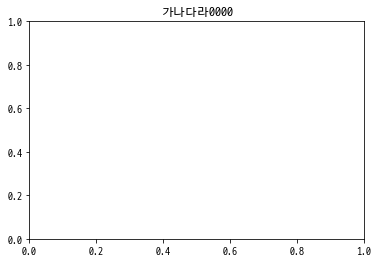

In [8]:
plt.figure()
plt.title("가나다라0000")